# Reti neurali
IRIS


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [ ]:
#%tensorflow_version 1.x

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X =iris.data
y =iris.target

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667)

In [ ]:
# # # One hot encoding
# enc = OneHotEncoder()
# y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()

# # oppore
# loss = 'sparse_categorical_crossentropy'
# se usiamo il one hot encoder ---> optimizer == categorical_crossentropy, altrimenti optimizer == sparse_categorical_crossentropy

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)

In [ ]:
X_train.shape[1]

4

In [ ]:
import tensorflow as tf
tf.random.set_seed(667) 

model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#the sparse_categorical_crossentropy is defined as categorical crossentropy with integer targets
#the categorical_crossentropy is defined as categorical cross-entropy between an output tensor and a target tensor.

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=Adam(lr=0.04), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7697 - accuracy: 0.6406
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8078
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9071
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.8696
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1162 - accuracy: 0.9757
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9546
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9788
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9660
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9882
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9851


In [ ]:
loss, acc = model.evaluate(X_train, y_train)
print("Loss sul train set: %.4f" % loss)
print("Accuracy sul train set: %.4f" % acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9619
Loss sul train set: 0.0626
Accuracy sul train set: 0.9619


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[8.87785136e-05, 4.29114774e-02, 9.56999719e-01],
       [9.99912858e-01, 7.37165683e-05, 1.34894144e-05],
       [1.13873866e-04, 9.99138594e-01, 7.47560116e-04],
       [9.04101908e-05, 9.99662280e-01, 2.47282442e-04],
       [1.72266664e-04, 9.99664187e-01, 1.63492659e-04],
       [2.87407951e-04, 9.98846531e-01, 8.66043963e-04],
       [4.82971518e-04, 4.80753124e-01, 5.18763959e-01],
       [3.63762229e-05, 6.51534181e-03, 9.93448317e-01],
       [1.49097148e-04, 9.99335229e-01, 5.15646243e-04],
       [1.80383038e-04, 2.16191679e-01, 7.83627868e-01],
       [9.99731719e-01, 2.59587017e-04, 8.65866241e-06],
       [1.48095933e-04, 9.83761966e-01, 1.60898939e-02],
       [1.12741305e-04, 9.99633193e-01, 2.54113460e-04],
       [9.99847770e-01, 1.42781879e-04, 9.44261319e-06],
       [1.12604401e-04, 3.84671539e-02, 9.61420238e-01],
       [6.71995513e-05, 1.25512555e-02, 9.87381518e-01],
       [9.99873638e-01, 1.15428338e-04, 1.09362245e-05],
       [9.99782622e-01, 2.06869

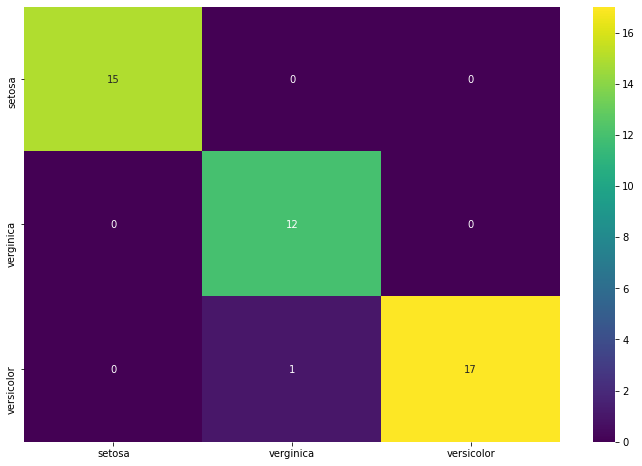

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='viridis');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# from sklearn.metrics import roc_curve, auc
# y_pred = model.predict(X_test).ravel() #flatten array

# plt.figure(figsize=(12,10))

# nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='*', label='Neural Network (auc = %0.3f)' % auc_keras);

# # Title
# plt.title('ROC CURVE Plot')

# #Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# #Legend
# plt.legend();

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

In [ ]:
model.save('iris.h5') 

In [ ]:
load_model = load_model('iris.h5')

In [ ]:
# [[Feature1, Feature2....,Feature[30]]]
new_sample = [[1,6,6,8],
             [0,0,2,0]]
len(new_sample[0])

4

In [ ]:
scaler = MinMaxScaler()
new_sample_scaled = scaler.fit_transform(new_sample)

In [ ]:
load_model.predict(new_sample_scaled)

array([[4.2767762e-04, 2.2948089e-01, 7.7009141e-01],
       [1.6594652e-02, 9.8315191e-01, 2.5340213e-04]], dtype=float32)

In [ ]:
prediction = load_model.predict(new_sample_scaled)

In [ ]:
predict_label=np.argmax(prediction,axis=1)
predict_label

array([2, 1])

In [ ]:
def pred(x):
    res = []
    for i in x:
        if i==0:
            res.append('setosa')
        elif i==1:
            res.append('verginica')      
        else:
            res.append('versicolor')
    return res

In [ ]:
pred(predict_label)

['versicolor', 'verginica']

## Early Stopping + Validation

Early Stopping -->Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

Arguments

    - monitor: Quantity to be monitored.
    - min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than  min_delta, will count as no improvement.
    - patience: Number of epochs with no improvement after which training will be stopped.
    - verbose: verbosity mode.
    - mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
    - baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
    - restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train/test + Validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=667)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=667) # 0.25 x 0.8 = 0.2


model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(3,activation='softmax',kernel_initializer='random_normal'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics =['accuracy'])

monitor = EarlyStopping(monitor='val_loss',
                        min_delta=1e-3, 
                        patience=5,
                        verbose=1, 
                        mode='auto', 
                        restore_best_weights=True)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val,y_val),
                    callbacks=[monitor],
                    verbose=2,
                    epochs=1000)

Epoch 1/1000
3/3 - 1s - loss: 1.0985 - accuracy: 0.3452 - val_loss: 1.0970 - val_accuracy: 0.2857
Epoch 2/1000
3/3 - 0s - loss: 1.0966 - accuracy: 0.5238 - val_loss: 1.0954 - val_accuracy: 0.5714
Epoch 3/1000
3/3 - 0s - loss: 1.0945 - accuracy: 0.7024 - val_loss: 1.0929 - val_accuracy: 0.6071
Epoch 4/1000
3/3 - 0s - loss: 1.0914 - accuracy: 0.7024 - val_loss: 1.0893 - val_accuracy: 0.6071
Epoch 5/1000
3/3 - 0s - loss: 1.0873 - accuracy: 0.7262 - val_loss: 1.0844 - val_accuracy: 0.6071
Epoch 6/1000
3/3 - 0s - loss: 1.0817 - accuracy: 0.7143 - val_loss: 1.0777 - val_accuracy: 0.5714
Epoch 7/1000
3/3 - 0s - loss: 1.0744 - accuracy: 0.7143 - val_loss: 1.0690 - val_accuracy: 0.5714
Epoch 8/1000
3/3 - 0s - loss: 1.0642 - accuracy: 0.7143 - val_loss: 1.0568 - val_accuracy: 0.5714
Epoch 9/1000
3/3 - 0s - loss: 1.0504 - accuracy: 0.7143 - val_loss: 1.0402 - val_accuracy: 0.5714
Epoch 10/1000
3/3 - 0s - loss: 1.0328 - accuracy: 0.7143 - val_loss: 1.0186 - val_accuracy: 0.5714
Epoch 11/1000
3/3 -

Text(0.5, 1.0, 'Training and validation accuracy')

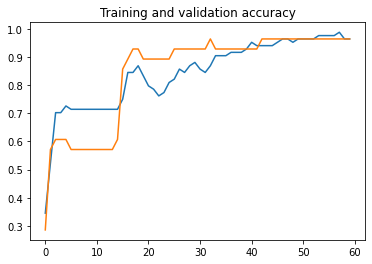

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

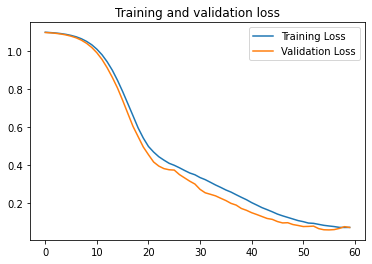

In [ ]:
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()